# Cuaderno para aplicar codificación


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd


In [3]:
inPath = "/content/drive/MyDrive/mineriaDatos/procesamiento/input"
file2 = os.path.join(inPath, 'Saber_11__2019-2_NO_NA_traducida.csv')
file2

'/content/drive/MyDrive/mineriaDatos/procesamiento/input/Saber_11__2019-2_NO_NA_traducida.csv'

In [4]:
df = pd.read_csv(file2, sep=";", encoding='latin-1')
df.dtypes

PUNT_LECTURA_CRITICA               int64
DESEMP_LECTURA_CRITICA             int64
PUNT_MATEMATICAS                   int64
DESEMP_MATEMATICAS                 int64
PUNT_C_NATURALES                   int64
DESEMP_C_NATURALES                 int64
PUNT_SOCIALES_CIUDADANAS           int64
DESEMP_SOCIALES_CIUDADANAS         int64
PUNT_INGLES                        int64
PUNT_GLOBAL                        int64
ESTU_INSE_INDIVIDUAL             float64
ESTU_NSE_INDIVIDUAL                int64
ESTU_NSE_ESTABLECIMIENTO           int64
ESTU_EDAD                        float64
ESTU_TIPODOCUMENTO                 int64
ESTU_NACIONALIDAD                  int64
ESTU_GENERO                        int64
ESTU_TIENEETNIA                    int64
ESTU_ETNIA                         int64
ESTU_DEPTO_RESIDE                  int64
FAMI_ESTRATOVIVIENDA               int64
FAMI_PERSONASHOGAR                 int64
FAMI_CUARTOSHOGAR                  int64
FAMI_EDUCACIONPADRE                int64
FAMI_EDUCACIONMA

In [5]:
convert_dict = {'ESTU_NSE_INDIVIDUAL': "object",
                'ESTU_NSE_ESTABLECIMIENTO': "object",
                'ESTU_TIPODOCUMENTO':  "object",
                'ESTU_NACIONALIDAD':  "object",
                'ESTU_GENERO': "object",
                'ESTU_TIENEETNIA': "object",
                'ESTU_ETNIA': "object",
                'ESTU_DEPTO_RESIDE': "object",
                'FAMI_ESTRATOVIVIENDA': "object",
                'FAMI_PERSONASHOGAR': "object",
                'FAMI_CUARTOSHOGAR': "object",
                'FAMI_EDUCACIONPADRE': "object",
                'FAMI_EDUCACIONMADRE': "object",
                'FAMI_TRABAJOLABORPADRE': "object",
                'FAMI_TRABAJOLABORMADRE': "object",
                'FAMI_TIENEINTERNET': "object",
                'FAMI_TIENESERVICIOTV': "object",
                'FAMI_TIENECOMPUTADOR': "object",
                'FAMI_TIENELAVADORA': "object",
                'FAMI_TIENEHORNOMICROOGAS': "object",
                'FAMI_TIENEAUTOMOVIL': "object",
                'FAMI_TIENEMOTOCICLETA': "object",
                'FAMI_TIENECONSOLAVIDEOJUEGOS': "object",
                'FAMI_NUMLIBROS': "object",
                'FAMI_COMELECHEDERIVADOS': "object",
                'FAMI_COMECARNEPESCADOHUEVO': "object",
                'FAMI_COMECEREALFRUTOSLEGUMBRE': "object",
                'FAMI_SITUACIONECONOMICA': "object",
                'ESTU_DEDICACIONLECTURADIARIA': "object",
                'ESTU_DEDICACIONINTERNET': "object",
                'ESTU_HORASSEMANATRABAJA': "object",
                'ESTU_TIPOREMUNERACION': "object",
                'COLE_GENERO': "object",
                'COLE_NATURALEZA': "object",
                'COLE_CALENDARIO': "object",
                'COLE_CARACTER': "object",
                'COLE_SEDE_PRINCIPAL': "object",
                'COLE_AREA_UBICACION': "object",
                'COLE_JORNADA': "object"}

df = df.astype(convert_dict)
df.dtypes
#dfAE = df.iloc[:, 11:51]
#dfAE.columns

PUNT_LECTURA_CRITICA               int64
DESEMP_LECTURA_CRITICA             int64
PUNT_MATEMATICAS                   int64
DESEMP_MATEMATICAS                 int64
PUNT_C_NATURALES                   int64
DESEMP_C_NATURALES                 int64
PUNT_SOCIALES_CIUDADANAS           int64
DESEMP_SOCIALES_CIUDADANAS         int64
PUNT_INGLES                        int64
PUNT_GLOBAL                        int64
ESTU_INSE_INDIVIDUAL             float64
ESTU_NSE_INDIVIDUAL               object
ESTU_NSE_ESTABLECIMIENTO          object
ESTU_EDAD                        float64
ESTU_TIPODOCUMENTO                object
ESTU_NACIONALIDAD                 object
ESTU_GENERO                       object
ESTU_TIENEETNIA                   object
ESTU_ETNIA                        object
ESTU_DEPTO_RESIDE                 object
FAMI_ESTRATOVIVIENDA              object
FAMI_PERSONASHOGAR                object
FAMI_CUARTOSHOGAR                 object
FAMI_EDUCACIONPADRE               object
FAMI_EDUCACIONMA

In [6]:
#convert_dict = {"DESEMP_INGLES":"object"}
#df = df.astype(convert_dict)
#df.dtypes

In [7]:
df2 = df.query("DESEMP_INGLES in (1,4)")

In [8]:
dfClass1 = df2.query("DESEMP_INGLES == 1")
dfClass2 = df2.query("DESEMP_INGLES == 4")
N1 = len(dfClass1)
N2 = len(dfClass2)
# Porcentaje de entrenamiento

pe = 0.7           # Porcentaje de Entrenamiento
pt = round(1-pe,2) # Porcentaje de Test

# Número de datos de entrenamiento
train1 = int(N1*pe)
train2 = int(N2*pe)
# Número de datos de test
test1 = N1-train1
test2 = N2-train2
# Fijar semilla para reproducibilidad
np.random.seed(11)
# Elegir los indices de las filas a seleccionar para entrenamiento de manera aleatoria
train_choice1 = np.random.choice(N1,train1,replace=False)
train_choice2 = np.random.choice(N2,train2,replace=False)
# Extraer datos seleccionados: features = labels
x_train1=dfClass1.iloc[train_choice1,:]
x_train2=dfClass2.iloc[train_choice2,:]
print("Tamaño de Datos de Entrenamiento Class=1 :",x_train1.shape)
print("Tamaño de Datos de Entrenamiento Class=2 :",x_train2.shape)

# Elegir los indices de las filas a seleccionar para test 
test_choice1=np.setdiff1d(range(N1),train_choice1)
test_choice2=np.setdiff1d(range(N2),train_choice2)
# Extraer datos seleccionados
x_test1=dfClass1.iloc[test_choice1,:]
x_test2=dfClass2.iloc[test_choice2,:]

print("Tamaño de Datos de Test  Class=1       :",x_test1.shape)
print("Tamaño de Datos de Test  Class=2       :",x_test2.shape)

frames = [x_test1, x_test2]
x_test = pd.concat(frames)

frames = [x_train1, x_train2]
x_train = pd.concat(frames)

print("Total de Datos                 :",len(x_train)+len(x_test))
print("Tamaño de Datos de Entrenamiento :",x_train.shape)
print("Tamaño de Datos de Test      :",x_test.shape)

Tamaño de Datos de Entrenamiento Class=1 : (146791, 52)
Tamaño de Datos de Entrenamiento Class=2 : (21939, 52)
Tamaño de Datos de Test  Class=1       : (62911, 52)
Tamaño de Datos de Test  Class=2       : (9403, 52)
Total de Datos                 : 241044
Tamaño de Datos de Entrenamiento : (168730, 52)
Tamaño de Datos de Test      : (72314, 52)


In [9]:
X = x_train.iloc[:, 11:51]
y = x_train["DESEMP_INGLES"]

In [10]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [11]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 3.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_2 <= 17.32
|   |   |   |   |--- feature_24 <= 1.50
|   |   |   |   |   |--- feature_28 <= 2.50
|   |   |   |   |   |   |--- feature_38 <= 1.50
|   |   |   |   |   |   |   |--- feature_29 <= 3.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 15.85
|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- feature_2 >  15.85
|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= 16.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- feature_8 >  16.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncate

In [12]:
data_crosstab = pd.crosstab(clf.predict(X),
                            y, 
                            margins = False)
data_crosstab

DESEMP_INGLES,1,4
row_0,,
1,146791,0
4,0,21939


In [15]:
data_crosstab = pd.crosstab(clf.predict(x_test.iloc[:, 11:51]),
                            x_test["DESEMP_INGLES"], 
                            margins = False)
data_crosstab

DESEMP_INGLES,1,4
row_0,,
1,58621,3788
4,4290,5615


In [16]:
clfT1 = tree.DecisionTreeClassifier(max_depth=1)
clfT2 = tree.DecisionTreeClassifier(max_depth=2)
clfT3 = tree.DecisionTreeClassifier(max_depth=3)
clfT4 = tree.DecisionTreeClassifier(max_depth=4)
clfT5 = tree.DecisionTreeClassifier(max_depth=5)
clfT6 = tree.DecisionTreeClassifier(max_depth=6)
clfT7 = tree.DecisionTreeClassifier(max_depth=7)
clfT8 = tree.DecisionTreeClassifier(max_depth=8)
clfT9 = tree.DecisionTreeClassifier(max_depth=9)
clfT10 = tree.DecisionTreeClassifier(max_depth=10)
clfT1 = clfT1.fit(X, y)
clfT2 = clfT2.fit(X, y)
clfT3 = clfT3.fit(X, y)
clfT4 = clfT4.fit(X, y)
clfT5 = clfT5.fit(X, y)
clfT6 = clfT6.fit(X, y)
clfT7 = clfT7.fit(X, y)
clfT8 = clfT8.fit(X, y)
clfT9 = clfT9.fit(X, y)
clfT10 = clfT10.fit(X, y)

In [22]:
def medidasAcuracy(clfT1, X_train, x_train):
  data_crosstab = pd.crosstab(clfT1.predict(X_train),
                             x_train.DESEMP_INGLES, 
                             margins = False)
  #acurracy = (data_crosstab.iloc[0,0] + data_crosstab.iloc[1,1])  / len(X_train)
  errTrain = (data_crosstab.iloc[1,0] + data_crosstab.iloc[0,1])  / len(X_train)
  #errtest  = (data_crosstab.iloc[1,0] + data_crosstab.iloc[0,1])  / len(X_test)
  #precision = data_crosstab.iloc[0,0] / (data_crosstab.iloc[0,0] + data_crosstab.iloc[0,1]) 
  #recall = data_crosstab.iloc[0,0] / (data_crosstab.iloc[0,0] + data_crosstab.iloc[1,0]) 
  #F1 = 2 / ( (1 / recall) + (1 / precision) )
  #return(np.array([acurracy, errorClas, precision, recall, F1]))
  return(errTrain)

In [24]:
d = {'modelo': ["clfT1","clfT2","clfT3","clfT4","clfT5","clfT6","clfT7","clfT8","clfT9","clfT10"], 
     'errTrain': [medidasAcuracy(clfT1, X, x_train), medidasAcuracy(clfT2, X, x_train),medidasAcuracy(clfT3, X, x_train),
                  medidasAcuracy(clfT4, X, x_train),medidasAcuracy(clfT5, X, x_train),medidasAcuracy(clfT6, X, x_train),
                  medidasAcuracy(clfT7, X, x_train),medidasAcuracy(clfT8, X, x_train),medidasAcuracy(clfT9, X, x_train),
                  medidasAcuracy(clfT10, X, x_train)],
     'errTest': [medidasAcuracy(clfT1, x_test.iloc[:, 11:51], x_test), medidasAcuracy(clfT2, x_test.iloc[:, 11:51], x_test),medidasAcuracy(clfT3, x_test.iloc[:, 11:51], x_test),
                  medidasAcuracy(clfT4, x_test.iloc[:, 11:51], x_test),medidasAcuracy(clfT5, x_test.iloc[:, 11:51], x_test),medidasAcuracy(clfT6, x_test.iloc[:, 11:51], x_test),
                  medidasAcuracy(clfT7, x_test.iloc[:, 11:51], x_test),medidasAcuracy(clfT8, x_test.iloc[:, 11:51], x_test),medidasAcuracy(clfT9, x_test.iloc[:, 11:51], x_test),
                  medidasAcuracy(clfT10, x_test.iloc[:, 11:51], x_test)]}
comparacion = pd.DataFrame(data=d)
comparacion

,modelo,errTrain,errTest
0,clfT1,0.092230,0.092029
1,clfT2,0.092230,0.092029
2,clfT3,0.082511,0.082958
3,clfT4,0.082108,0.082778
4,clfT5,0.081331,0.082156
5,clfT6,0.080987,0.081990
6,clfT7,0.077734,0.078864
7,clfT8,0.077017,0.079030
8,clfT9,0.075387,0.079431
9,clfT10,0.072512,0.079348


In [33]:
data_crosstab = pd.crosstab(clfT7.predict(x_test.iloc[:, 11:51]),
                            x_test["DESEMP_INGLES"], 
                            margins = False)
data_crosstab

DESEMP_INGLES,1,4
row_0,,
1,61626,4418
4,1285,4985


In [34]:
data_crosstab = pd.crosstab(clfT7.predict(x_train.iloc[:, 11:51]),
                            x_train["DESEMP_INGLES"], 
                            margins = False)
data_crosstab

DESEMP_INGLES,1,4
row_0,,
1,143842,10167
4,2949,11772


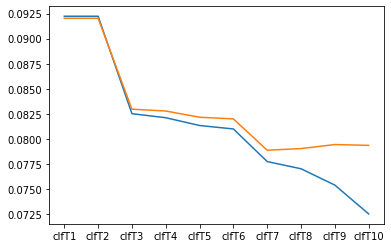

In [28]:
 import matplotlib.pyplot as plt
plt.plot(comparacion.modelo, comparacion.errTrain, comparacion.errTest)

In [35]:
text_representation = tree.export_text(clfT7)
print(text_representation)

|--- feature_1 <= 3.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_2 <= 17.32
|   |   |   |   |--- feature_24 <= 1.50
|   |   |   |   |   |--- feature_28 <= 2.50
|   |   |   |   |   |   |--- feature_38 <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_38 >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_28 >  2.50
|   |   |   |   |   |   |--- feature_13 <= 7.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_13 >  7.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_24 >  1.50
|   |   |   |   |   |--- feature_16 <= 1.50
|   |   |   |   |   |   |--- feature_38 <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_38 >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_16 >  1.50
|   |   |   |   |   |   |--- feature_29 <= 3.50
|   |   |   |   |   |   |   |--- class:

In [38]:
import graphviz 

In [43]:
dot_data = tree.export_graphviz(clfT7, out_file=None, 
                     feature_names=X.columns,  
                     class_names="DESEMP_INGLES",  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph.save(os.path.join(inPath, "ArbolDecision.png") )
graph.render(directory=inPath, view=True)  

'/content/drive/MyDrive/mineriaDatos/procesamiento/input/Source.gv.pdf'